In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
import pickle
import networkx as nx
import networkx as nx
import math

In [2]:
APF_adjweightS2018 = pd.read_csv('APF_adjweightS2018.csv', low_memory=False)
APF_adjweightS2019 = pd.read_csv('APF_adjweightS2019.csv', low_memory=False)
APF_adjweightS2020 = pd.read_csv('APF_adjweightS2020.csv', low_memory=False)

In [3]:
file2018 = open('dfcompdict2018.pickle', 'rb')
dfcompdict2018 = pickle.load(file2018)
file2018.close()
entityids2018 = []
for key in dfcompdict2018:
    entityids2018.append(key)

file2019 = open('dfcompdict2019.pickle', 'rb')
dfcompdict2019 = pickle.load(file2019)
file2019.close()
entityids2019 = []
for key in dfcompdict2019:
    entityids2019.append(key)

file2020 = open('dfcompdict2020.pickle', 'rb')
dfcompdict2020 = pickle.load(file2020)
file2020.close()
entityids2020 = []
for key in dfcompdict2020:
    entityids2020.append(key)

In [4]:
APF_adjweightS2018.set_index('Unnamed: 0',inplace=True)
APF_adjweightS2019.set_index('Unnamed: 0',inplace=True)
APF_adjweightS2020.set_index('Unnamed: 0',inplace=True)

In [5]:
APF_adjweightS2018 = APF_adjweightS2018/len(entityids2018)
APF_adjweightS2019 = APF_adjweightS2019/len(entityids2019)
APF_adjweightS2020 = APF_adjweightS2020/len(entityids2020)

In [6]:
file2018 = open('Ei2018.pickle', 'rb')
Ei2018 = pickle.load(file2018)
file2018.close()
file2019 = open('Ei2019.pickle', 'rb')
Ei2019 = pickle.load(file2019)
file2019.close()
file2020 = open('Ei2020.pickle', 'rb')
Ei2020 = pickle.load(file2020)
file2020.close()

In [7]:
file2018 = open('eventlist2018.pickle', 'rb')
eventlist2018 = pickle.load(file2018)
file2018.close()

eventlist2018all = set()
for key in eventlist2018:
    eventlist2018all = set.union(eventlist2018all,set(eventlist2018[key]))

In [8]:
file2019 = open('eventlist2019.pickle', 'rb')
eventlist2019 = pickle.load(file2019)
file2019.close()

eventlist2019all = set()
for key in eventlist2019:
    eventlist2019all = set.union(eventlist2019all,set(eventlist2019[key]))

In [9]:
file2020 = open('eventlist2020.pickle', 'rb')
eventlist2020 = pickle.load(file2020)
file2020.close()

eventlist2020all = set()
for key in eventlist2020:
    eventlist2020all = set.union(eventlist2020all,set(eventlist2020[key]))

In [10]:
Wi2018term1 = {}
for eventi in list(eventlist2018all):
    eventisum = 0
    for eventj in list(eventlist2018all):
        if eventi != eventj:
            eventisum = eventisum + APF_adjweightS2018.at[eventi,eventj] + APF_adjweightS2018.at[eventj,eventi]
    Wi2018term1[eventi] = eventisum

In [11]:
Wi2019term1 = {}
for eventi in eventlist2019all:
    eventisum = 0
    for eventj in eventlist2019all:
        if eventi != eventj:
            eventisum = eventisum + APF_adjweightS2019.at[eventi,eventj] + APF_adjweightS2019.at[eventj,eventi]
    Wi2019term1[eventi] = eventisum

In [12]:
Wi2020term1 = {}
for eventi in eventlist2020all:
    eventisum = 0
    for eventj in eventlist2020all:
        if eventi != eventj:
            eventisum = eventisum + APF_adjweightS2020.at[eventi,eventj] + APF_adjweightS2020.at[eventj,eventi]
    Wi2020term1[eventi] = eventisum

In [14]:
Wi2019term2 = {}
for eventi in tqdm(eventlist2019all):
    eventisum = 0
    for eventk in eventlist2019all:
        if eventi != eventk:
            for eventj in eventlist2019all:
                Pik,Pij,Akj,Ajk = 0,0,0,0
                if eventj != eventi and eventj != eventk:
                    Pik = APF_adjweightS2019.at[eventi,eventk] + APF_adjweightS2019.at[eventk,eventi] - (APF_adjweightS2019.at[eventi,eventk]*APF_adjweightS2019.at[eventk,eventi])
                    Pij = APF_adjweightS2019.at[eventi,eventj] + APF_adjweightS2019.at[eventj,eventi] - (APF_adjweightS2019.at[eventi,eventj]*APF_adjweightS2019.at[eventj,eventi])
                    Akj = APF_adjweightS2019.at[eventk,eventj]
                    Ajk = APF_adjweightS2019.at[eventj,eventk]
                eventisum = eventisum + Pik*Pij*(Akj+Ajk)        
    Wi2019term2[eventi] = eventisum

100%|██████████| 213/213 [09:44<00:00,  2.74s/it]


In [15]:
Wi2019 = {}
for key in Wi2019term2:
    Wi2019[key] = Wi2019term1[key] + Wi2019term2[key]

In [16]:
with open('Wi2019.pickle', 'wb') as filehandle:
    pickle.dump(Wi2019, filehandle)

In [17]:
Wi2018term2 = {}
for eventi in tqdm(eventlist2018all):
    eventisum = 0
    for eventk in eventlist2018all:
        if eventi != eventk:
            for eventj in eventlist2018all:
                Pik,Pij,Akj,Ajk = 0,0,0,0
                if eventj != eventi and eventj != eventk:
                    Pik = APF_adjweightS2018.at[eventi,eventk] + APF_adjweightS2018.at[eventk,eventi] - (APF_adjweightS2018.at[eventi,eventk]*APF_adjweightS2018.at[eventk,eventi])
                    Pij = APF_adjweightS2018.at[eventi,eventj] + APF_adjweightS2018.at[eventj,eventi] - (APF_adjweightS2018.at[eventi,eventj]*APF_adjweightS2018.at[eventj,eventi])
                    Akj = APF_adjweightS2018.at[eventk,eventj]
                    Ajk = APF_adjweightS2018.at[eventj,eventk]
                eventisum = eventisum + Pik*Pij*(Akj+Ajk)        
    Wi2018term2[eventi] = eventisum

100%|██████████| 214/214 [09:40<00:00,  2.71s/it]


In [18]:
Wi2018 = {}
for key in Wi2018term2:
    Wi2018[key] = Wi2018term1[key] + Wi2018term2[key]
    
with open('Wi2018.pickle', 'wb') as filehandle:
    pickle.dump(Wi2018, filehandle)

In [19]:
Wi2020term2 = {}
for eventi in tqdm(eventlist2020all):
    eventisum = 0
    for eventk in eventlist2020all:
        if eventi != eventk:
            for eventj in eventlist2020all:
                Pik,Pij,Akj,Ajk = 0,0,0,0
                if eventj != eventi and eventj != eventk:
                    Pik = APF_adjweightS2020.at[eventi,eventk] + APF_adjweightS2020.at[eventk,eventi] - (APF_adjweightS2020.at[eventi,eventk]*APF_adjweightS2020.at[eventk,eventi])
                    Pij = APF_adjweightS2020.at[eventi,eventj] + APF_adjweightS2020.at[eventj,eventi] - (APF_adjweightS2020.at[eventi,eventj]*APF_adjweightS2020.at[eventj,eventi])
                    Akj = APF_adjweightS2020.at[eventk,eventj]
                    Ajk = APF_adjweightS2020.at[eventj,eventk]
                eventisum = eventisum + Pik*Pij*(Akj+Ajk)        
    Wi2020term2[eventi] = eventisum

100%|██████████| 215/215 [09:37<00:00,  2.69s/it]


In [20]:
Wi2020 = {}
for key in Wi2020term2:
    Wi2020[key] = Wi2020term1[key] + Wi2020term2[key]
    
with open('Wi2020.pickle', 'wb') as filehandle:
    pickle.dump(Wi2020, filehandle)

In [33]:

Wi2019 = {}
for key in Wi2019term2:
    Wi2019[key] = Wi2019term1[key] + Wi2019term2[key]
Wi2020 = {}
for key in Wi2020term2:
    Wi2020[key] = Wi2020term1[key] + Wi2020term2[key]

In [34]:
with open('Wi2018.pickle', 'wb') as filehandle:
    pickle.dump(Wi2018, filehandle)
with open('Wi2019.pickle', 'wb') as filehandle:
    pickle.dump(Wi2019, filehandle)
with open('Wi2020.pickle', 'wb') as filehandle:
    pickle.dump(Wi2020, filehandle)

In [37]:
# plotting
plottinglist2018 = []
for key in Ei2018:
    plottinglist2018.append([key, math.log(Ei2018[key]),math.log(Wi2018[key])])

In [38]:
# plotting
plottinglist2019 = []
for key in Ei2019:
    plottinglist2019.append([key, math.log(Ei2019[key]),math.log(Wi2019[key])])

In [39]:
# plotting
plottinglist2020 = []
for key in Ei2020:
    plottinglist2020.append([key, math.log(Ei2020[key]),math.log(Wi2020[key])])

In [40]:
plotlist2018 = np.array(plottinglist2018)
plotlist2019 = np.array(plottinglist2019)
plotlist2020 = np.array(plottinglist2020)

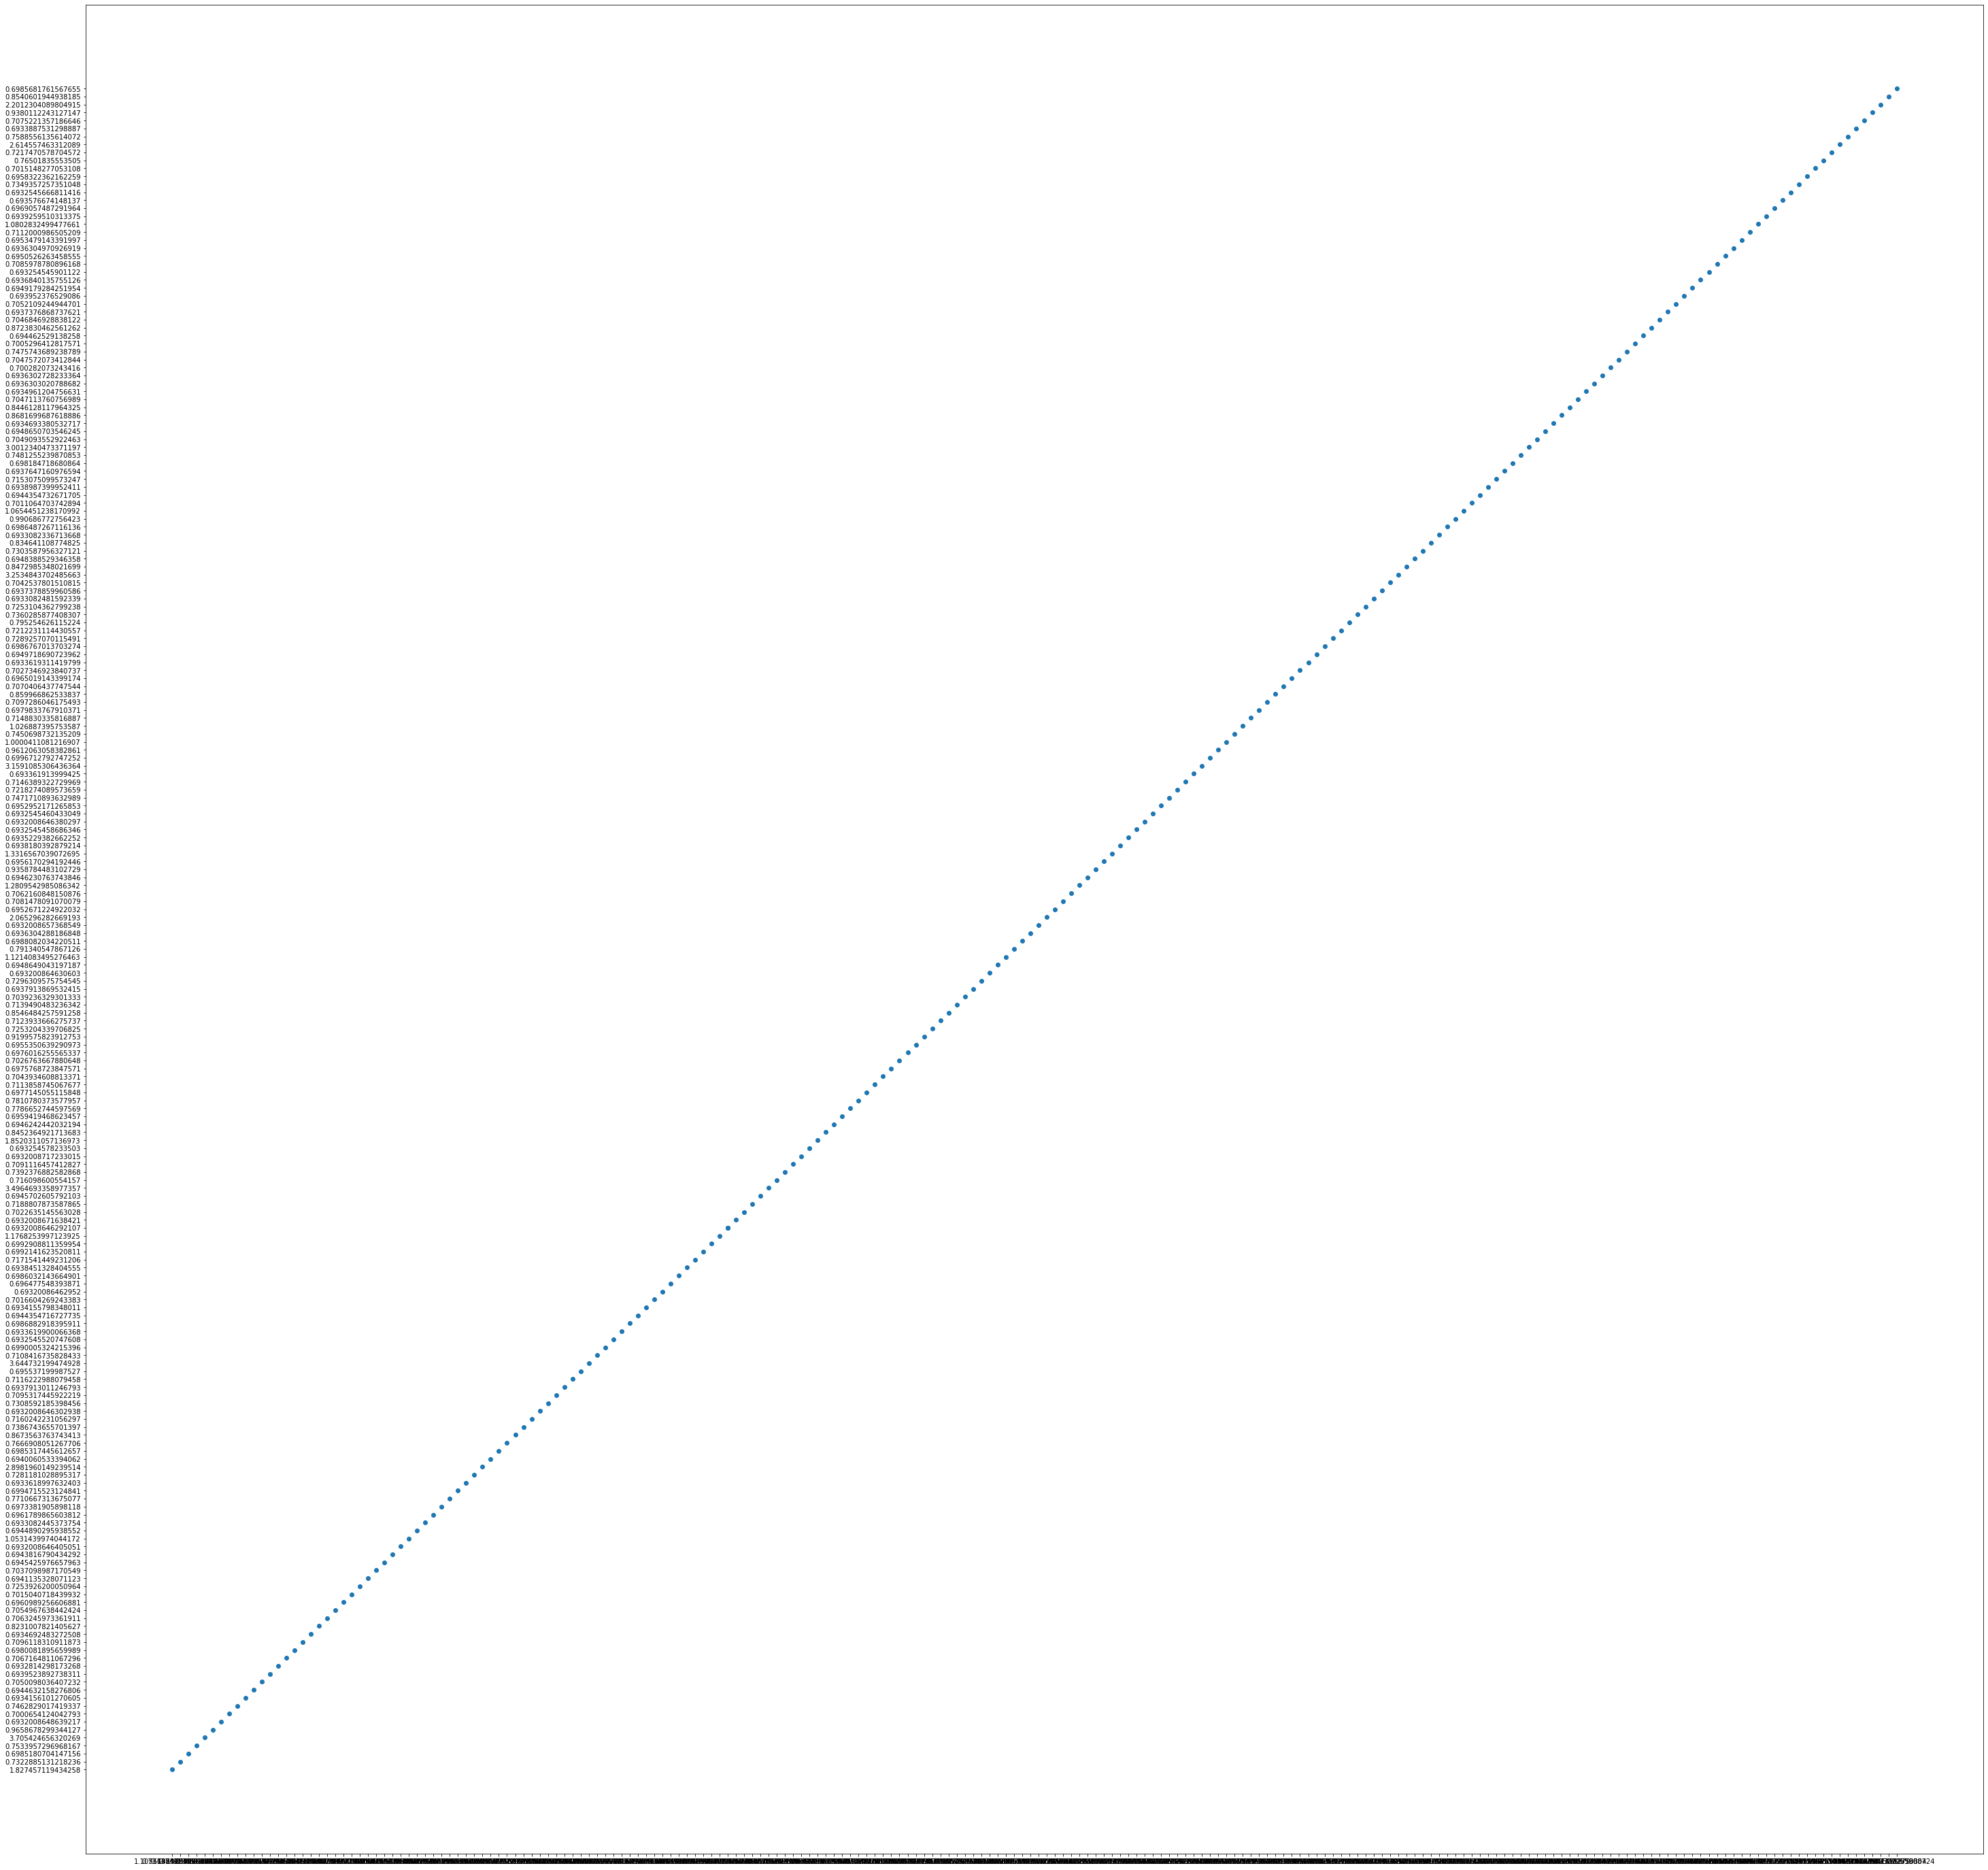

In [45]:
plt.figure(figsize=(50,50))
plt.scatter(plotlist2018[:,1],plotlist2018[:,2])

In [46]:
df2018 = pd.DataFrame(plottinglist2018)
df2019 = pd.DataFrame(plottinglist2019)
df2020 = pd.DataFrame(plottinglist2020)

In [47]:
df2018.columns = ['key','nodes','edges']
df2019.columns = ['key','nodes','edges']
df2020.columns = ['key','nodes','edges']

In [48]:
df2018.set_index('key', inplace=True)
df2019.set_index('key', inplace=True)
df2020.set_index('key', inplace=True)

In [49]:
df2018.sort_values(by='nodes')
df2019.sort_values(by='nodes')
df2020.sort_values(by='nodes')

,nodes,edges
key,,
insider-trading-lawsuit,0.693171,0.693171
dam-accident,0.693194,0.693194
board-member-health,0.693194,0.693194
priority-review-application,0.693194,0.693194
breakthrough-therapy-application,0.693194,0.693194
...,...,...
analyst-ratings-change,1.375782,1.890558
ownership,1.543844,2.389358
stock-price,1.653743,2.271672


In [50]:
df2018.to_csv('logedgesweights_egonet2018.csv')
df2019.to_csv('logedgesweights_egonet2019.csv')
df2020.to_csv('logedgesweights_egonet2020.csv')

In [51]:
outliercheck2018 = {}
for key in Ei2018:
    outliercheck2018[key] = (max([math.log(Wi2018[key]),m*(math.log(Ei2018[key]))+b])/min([math.log(Wi2018[key]),m*(math.log(Ei2018[key]))+b])) * math.log(abs((math.log(Wi2018[key])-m*(math.log(Ei2018[key]))+b)/math.log(Wi2018[key]))+1)
    

NameError: name 'm' is not defined

In [52]:
#least squares fitting

# Mean X and Y
mean_x = df2018[df2018.nodes<0.2].nodes.mean()
mean_y = df2018[df2018.nodes<0.2].edges.mean()
 
# Total number of values
n = len(df2018[df2018.nodes<0.2])
numer = 0
denom = 0
for i in range(n):
    numer += (df2018[df2018.nodes<0.2].nodes.values[i] - mean_x) * (df2018[df2018.nodes<0.2].edges.values[i] - mean_y)
    denom += (df2018[df2018.nodes<0.2].nodes.values[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

ZeroDivisionError: division by zero